## Principal Component Ananlysis

Demonstration of Principal Component Analysis on Breast Cancer Dataset

**PCA** is an unsupervised algorithm

In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data load and verification

In [2]:
# We will load the dataset from sklearn datasets

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
# This is a dictionary and we can view certain attributes of the same

cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Dataset description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
# We will now create a dataframe from this dictionary

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# Check the initial rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Check the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
# Check for any missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

There are no missing values in our dataset

### Data Scaling and Standardisation

#### Some notes on fit, transform and fit_transform

**1.Fit():** Method calculates the parameters μ and σ and saves them as internal objects.

**2.Transform():** Method using these calculated parameters apply the transformation to a particular dataset.

**3.Fit_transform():** joins the fit() and transform() method for transformation of dataset.

In [8]:
# Lets standardize the variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit(df)
#scaled_data = scaler.transform(df)

scaled_data = scaler.fit_transform(df)


### PCA Transformation

We will now attempt PCA transformation for dimensionality reduction in order to explain all the variances
in the data

In [27]:
# Necessary imports

from sklearn.decomposition import PCA

# We are attempting to reduce the existing 30 dimensions into just 2 principal components

pca = PCA(n_components=2)

pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
# Now we will transform this fitted data into principal components
x_pca = pca.transform(scaled_data)

#x_pca = pca.fit_transform(scaled_data)

# Check the shape after transformation
x_pca.shape

(569, 2)

Text(0.5, 1.0, 'Plots between Two Principal Components')

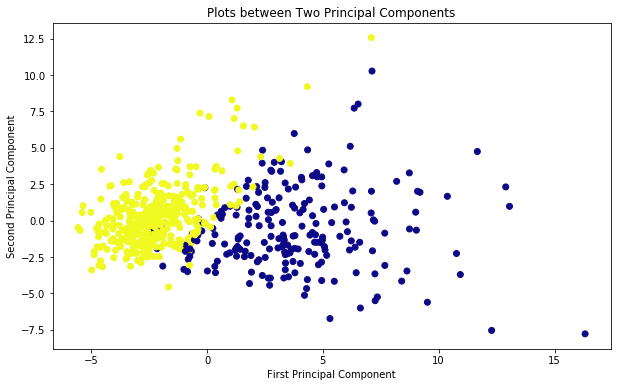

In [29]:
# Now we will plot out these dimensions

plt.figure(figsize=(10, 6))

# x_pca is a numpy array of two dimensions, so we want to plot all the rows for column 0 vs
# all the rows for column 1
plt.scatter(x=x_pca[:, 0], y=x_pca[:, 1], c=cancer['target'], cmap='plasma')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Plots between Two Principal Components")

Just by using two principal components, we are able to achieve a very clear separation between two target classes

In [30]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

This means, the first component explains <em>44.2%</em> variation in the data and the second component explains <em>18.9%</em> variance in the data. Together these two components explains approx. <em>64%</em> variance in data

In [31]:
# To see the components
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

This is a numpy matrix, where each row represents the principal component and each column actually relates 
to the actual features (the numbers are weightages or loading vectors getting multiplied to each feature)

In [32]:
# Lets create a dataframe to understand this
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


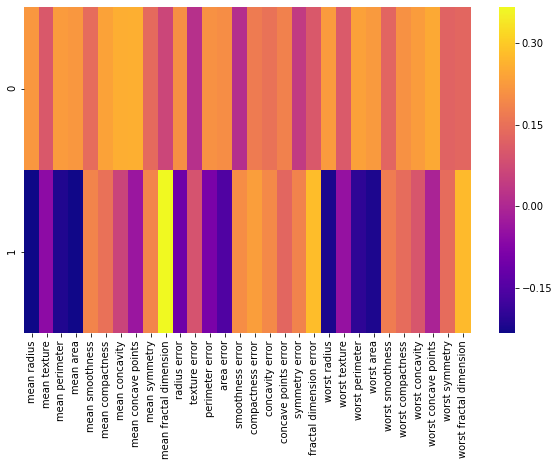

In [33]:
# We will try to visualize this using heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df_comp, cmap='plasma')

### Now we will combine PCA and Logistic regression to reduce dimensions and 
### use the reduced dimensions for predictions

#### First step - we will seggregate the features and target variable and perform train, test split

In [35]:
features = df
target = cancer['target']

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3,
                                                                           random_state=101)

#### Now we will fit into standard scale

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

#### Now we will apply PCA function

In [37]:
from sklearn.decomposition import PCA

# We will go with 2 principal components for all feature variables
pca = PCA(n_components=2)

features_train = pca.fit_transform(features_train)
features_test = pca.transform(features_test)

In [38]:
# Check for explained variance after PCA 
pca.explained_variance_ratio_

array([0.44570587, 0.20174682])

#### Now using this PCA components, we will model Logistic regression for classification

In [41]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=101, solver='liblinear')
classifier.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the test result and verify predictions using confusion matrix

In [48]:
predictions = classifier.predict(features_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Confusion Matrix")
print(confusion_matrix(target_test, predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, predictions))
print("\n")
print("Classfication Report")
classification_report(target_test, predictions)

Confusion Matrix
[[ 63   3]
 [  5 100]]


Accuracy Score
0.9532163742690059


Classfication Report


'              precision    recall  f1-score   support\n\n           0       0.93      0.95      0.94        66\n           1       0.97      0.95      0.96       105\n\n    accuracy                           0.95       171\n   macro avg       0.95      0.95      0.95       171\nweighted avg       0.95      0.95      0.95       171\n'